| |<font size="5">(Regularization)   الضبط في نماذج تعلم الآلة  </font>|
|-:|-:|
|<img src="https://i0.wp.com/www.nmthgiat.com/wp-content/uploads/2019/04/Overfitting.png?resize=554%2C158&ssl=1" width=400></img>||
||<font size="4"> تحميل البيانات ومعالجتها </font>| 
||<font size="4"> Train, Test  تحديد بيانات التدريب والاختبار </font>| 
||<font size="4">Sklearn  توظيف خوارزمية من مكتبة </font>| 
||<font size="4"> training   تدريب البيانات </font>| 
||<font size="4"> Metrics   تقويم أداء الخوارزمية </font>| 

![](https://media.geeksforgeeks.org/wp-content/uploads/20200107015710/HighBias.jpg)

$\large h_\theta(x)= g(\theta_0 +\theta_1 x_1 + \theta_2 x_2) $


- أفضل النماذج ملاءمة تكمن في  فرضية نقطة المقايضة 
![](https://media.geeksforgeeks.org/wp-content/uploads/20200107023418/1_oO0KYF7Z84nePqfsJ9E0WQ.png)

درجة تباين عالية

![](https://miro.medium.com/max/700/1*szpOBWtAkMwFkvVTBCGjqg.png)


$\large h_\theta(x)= g(\theta_0 +\theta_1 x + \theta_2 x^2+\theta_3 x^3+\theta_4 x^4) $


![](https://i1.wp.com/www.nmthgiat.com/wp-content/uploads/2019/04/beforeafter.png?resize=537%2C220&ssl=1)

![](https://miro.medium.com/max/700/1*OLh18FDyOhIEG5idV4kXFQ.png)

In [1]:
pwd

'/workspaces/ML-DL-with-Python/Module-0/Labs'

In [10]:
#تحميل البيانات 
import pandas as pd
import numpy as np
df= pd.read_csv("../data/HousePrice3.csv", index_col=0)

In [11]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [12]:
df.select_dtypes("number").corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [13]:
# قائمة المتغيرات الأكثر ارتباطا 

corr = df.select_dtypes("number").corr()['SalePrice'].sort_values(ascending=False)
corr[:5]
#SalePrice الاكتفاء بالمتغيرات الأكثر ارتباطا ب   

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64

In [14]:
from scipy.stats import shapiro, skew

def analyze_and_transform(data, column, name):
    # Shapiro-Wilk Test
    stat, p = shapiro(data[column].sample(1000, random_state=42))  # Sample for large datasets
    print(f"\nShapiro-Wilk Test for {name}: Statistic = {stat:.4f}, p-value = {p:.4f}")
    normality = "Normal" if p > 0.05 else "Not Normal"
    print(f"Distribution is {normality}")
    
    # Skewness
    skewness = skew(data[column])
    print(f"Skewness for {name}: {skewness:.4f}")
    print(f"Interpretation: |Skewness| > 1 indicates highly skewed")
    
    # Transformation if highly skewed
    if abs(skewness) > 1:
        data[f'{name}_log'] = np.log1p(data[column])  # Log transformation
        new_skewness = skew(data[f'{name}_log'])
        print(f"New Skewness after log transformation: {new_skewness}")
        return data[f'{name}_log']
    return data[column]

In [15]:
X=df[["OverallQual" ,"GrLivArea" , "GarageArea" , "TotalBsmtSF" ]]
y=df.SalePrice 


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   GrLivArea    1460 non-null   int64
 2   GarageArea   1460 non-null   int64
 3   TotalBsmtSF  1460 non-null   int64
dtypes: int64(4)
memory usage: 57.0 KB


In [17]:
X.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF
0,7,1710,548,856
1,6,1262,460,1262
2,7,1786,608,920
3,7,1717,642,756
4,8,2198,836,1145


In [18]:
# Apply to each feature
X_transformed = X.copy()
for col in X.columns:
    X_transformed[col] = analyze_and_transform(X_transformed, col, col)


Shapiro-Wilk Test for OverallQual: Statistic = 0.9479, p-value = 0.0000
Distribution is Not Normal
Skewness for OverallQual: 0.2167
Interpretation: |Skewness| > 1 indicates highly skewed

Shapiro-Wilk Test for GrLivArea: Statistic = 0.9173, p-value = 0.0000
Distribution is Not Normal
Skewness for GrLivArea: 1.3652
Interpretation: |Skewness| > 1 indicates highly skewed
New Skewness after log transformation: -0.006133943205449199

Shapiro-Wilk Test for GarageArea: Statistic = 0.9757, p-value = 0.0000
Distribution is Not Normal
Skewness for GarageArea: 0.1798
Interpretation: |Skewness| > 1 indicates highly skewed

Shapiro-Wilk Test for TotalBsmtSF: Statistic = 0.9003, p-value = 0.0000
Distribution is Not Normal
Skewness for TotalBsmtSF: 1.5227
Interpretation: |Skewness| > 1 indicates highly skewed
New Skewness after log transformation: -5.149372577588974


In [19]:
# 2. Normality Testing and Transformation for Target
print("\nNormality Analysis for Target\n{'-'*50}")

# Test and transform target
y_transformed = analyze_and_transform(df, 'SalePrice', 'SalePrice')



Normality Analysis for Target
{'-'*50}

Shapiro-Wilk Test for SalePrice: Statistic = 0.8576, p-value = 0.0000
Distribution is Not Normal
Skewness for SalePrice: 1.8809
Interpretation: |Skewness| > 1 indicates highly skewed
New Skewness after log transformation: 0.12122191311528363


In [20]:
# 3. Scale the transformed features
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT9GPc3te-hV52pZv1105UrkoNttMfzawJwFg&usqp=CAU" width=100></img>

![](../imgs/dataSplit.jpg)

In [22]:
#  Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_transformed, test_size=0.2, random_state=42)


In [23]:
X_train.shape, y_train.shape , X_test.shape, y_test.shape

((1168, 6), (1168,), (292, 6), (292,))

![](../imgs/model.png)

In [25]:
# Train the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# 6. Make predictions
y_pred = model.predict(X_test)

In [28]:
# 7. Evaluate the model
# import  scikit learn metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")


Model Evaluation:
Mean Squared Error: 0.03
R-squared Score: 0.8130


In [31]:
# Shapiro-Wilk Test on residuals (dynamic sampling to avoid ValueError)
# Calculate residuals
residuals = y_test - y_pred

sample_size = min(1000, len(residuals))  # Use up to 1000 or the full length
if len(residuals) > 5000:  # Large dataset warning threshold
    residual_sample = residuals.sample(sample_size, random_state=42)
else:
    residual_sample = residuals

stat, p = shapiro(residual_sample)
print(f"Shapiro-Wilk Test for Residuals: Statistic = {stat:.4f}, p-value = {p:.4f}")
normality = "Normal" if p > 0.05 else "Not Normal"
print(f"Residuals are {normality}")

Shapiro-Wilk Test for Residuals: Statistic = 0.9221, p-value = 0.0000
Residuals are Not Normal


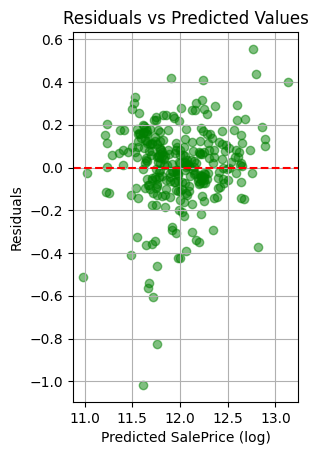

In [33]:
# 8.1 Residual Scatter Plot (Residuals vs Predicted Values)
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted SalePrice (log)')
plt.ylabel('Residuals')
plt.grid(True)

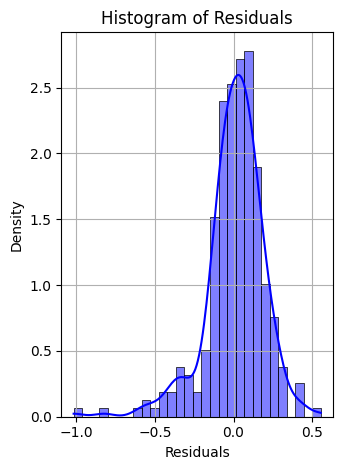

In [35]:
# 8.2 Histogram of Residuals with KDE
import seaborn as sns
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='blue', stat='density')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()

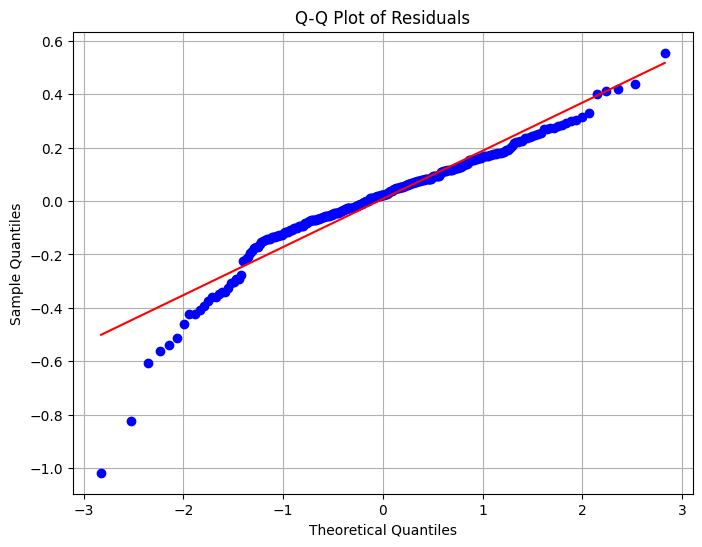

In [37]:
# 8.3 Q-Q Plot for Residuals
from scipy import stats
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

The Shapiro-Wilk test result you provided (Statistic = 0.9221, p-value = 0.0000) indicates that the residuals from your linear regression model are not normally distributed (since the p-value is < 0.05). This violation of the normality assumption for residuals in linear regression can affect the validity of statistical inferences (e.g., p-values, confidence intervals) and may suggest that the model isn’t capturing the underlying relationships in the data effectively.

However, linear regression is relatively robust to non-normal residuals for prediction purposes, especially with large datasets (like the Ames Housing dataset with ~1,460 rows). The primary concern with non-normal residuals is that it may indicate issues like non-linearity, heteroscedasticity, or omitted variables, which can lead to suboptimal model performance.



### Why Are Residuals Not Normal?
Non-normal residuals can result from several issues:
Non-Linear Relationships: If the relationship between features (OverallQual, GarageArea, TotalBsmtSF) and the target (SalePrice) is not linear, a linear model will struggle to fit the data, leading to non-normal residuals.

_Heteroscedasticity_: If the variance of residuals increases or decreases with predicted values, this violates the assumption of constant variance (homoscedasticity).

_Outliers_: Extreme values in the features or target can skew residuals.

Skewed Target or Features: Although you already applied transformations (e.g., log transformation to SalePrice), the residuals might still be affected by insufficient transformations or untransformed features.

_Omitted Variables_: Important predictors might be missing, causing the model to miss key patterns.

### Steps to Make Residuals More Acceptable

Here are several approaches to address non-normal residuals, prioritized based on likely effectiveness for your dataset:

1. Revisit Transformations
Target Transformation: You already applied a log transformation to SalePrice, which is a good start since SalePrice is typically right-skewed in the Ames dataset. However, if residuals are still non-normal, you might try alternative transformations (e.g., square root, Box-Cox) to further stabilize the target.

Feature Transformation: Ensure all features are appropriately transformed. Features like GarageArea and TotalBsmtSF can be skewed (e.g., right-skewed due to many zeros or small values), and the log transformation might not have been sufficient.

2. Add Polynomial or Interaction Terms
Linear regression assumes a linear relationship between features and the target. If the relationship is non-linear (e.g., SalePrice might increase non-linearly with TotalBsmtSF), adding polynomial terms (e.g., TotalBsmtSF^2) or interaction terms (e.g., OverallQual * GarageArea) can help capture these patterns, reducing residual non-normality.

3. Remove or Adjust Outliers
Outliers in the features or target can skew residuals. Removing or winsorizing (capping) extreme values can help normalize residuals.

4. Use Robust Regression
If transformations and feature engineering don’t resolve the issue, consider using a robust regression model (e.g., RANSACRegressor or HuberRegressor) that is less sensitive to outliers and non-normal residuals.

5. Switch to a Non-Linear Model
If the data inherently has non-linear relationships, a linear model may not be appropriate. Models like Random Forest, Gradient Boosting (e.g., XGBoost), or Generalized Additive Models (GAMs) can capture complex patterns without requiring normal residuals.

6. Check for Heteroscedasticity
If the residual plot shows a funnel shape (variance increasing with predicted values), this indicates heteroscedasticity. Transforming the target (already done) or using weighted least squares can help.

